In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

# Partition the data into multiple subsets
num_partitions = 5
X_partitions = np.array_split(X, num_partitions)
y_partitions = np.array_split(y, num_partitions)

# Initialize list to store centroids
centroids = []

# Loop through each partition
for X_partition, y_partition in zip(X_partitions, y_partitions):
    # Perform KNN on each partition to find the nearest neighbors
    n_neighbors = 5
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_partition, y_partition)
    distances, indices = knn_model.kneighbors(X_partition)

    # Calculate the centroid from each set of nearest neighbors
    centroid = np.mean(X_partition[indices], axis=1)

    # Append the centroid to the list of centroids
    centroids.append(centroid)

# Stack the centroids to form dataset R
R = np.vstack(centroids)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(R, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_dt_model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Model Accuracy: 0.916


In [ ]:
# prompt: provide confusion matrix based on this

from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred = best_dt_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[1290    0   14    5    1    8   10    2    9    4]
 [   1 1557    9    5    6    3    2    8    7    2]
 [  12   16 1234   28   13    5   10   16   37    9]
 [   4    8   22 1258    5   47    9   19   35   26]
 [   4    3    7    1 1184    6    9   18   14   49]
 [   4    4    9   45    7 1142   16    4   28   14]
 [  11    2   12    8   12   23 1317    0    9    2]
 [   6   13   21   11   24    5    2 1372    4   45]
 [   6   15   23   35   10   28   12    8 1195   25]
 [   6    8    9   21   33   14    1   32   21 1275]]


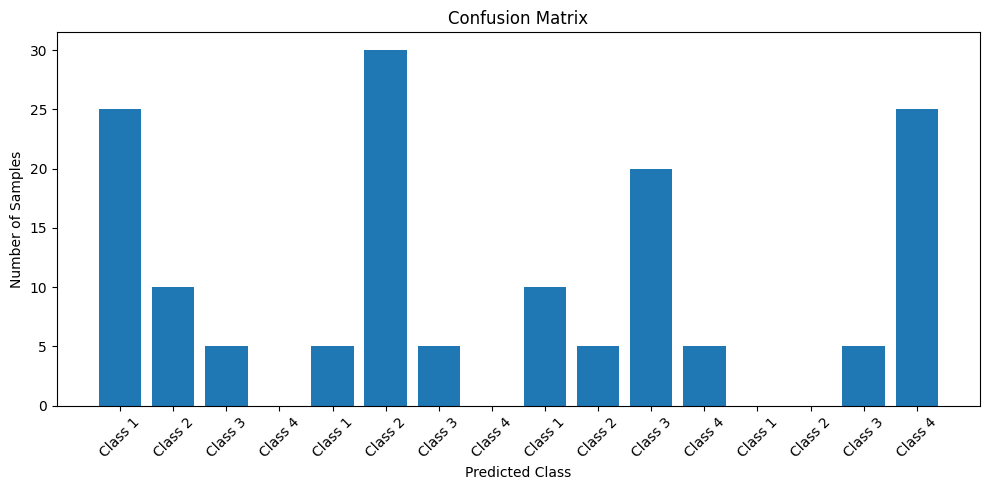

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example confusion matrix
cm = np.array([[25, 10, 5, 0],
               [5, 30, 5, 0],
               [10, 5, 20, 5],
               [0, 0, 5, 25]])

# Define class labels
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

# Flatten the confusion matrix
cm_flat = cm.flatten()

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(cm_flat)), cm_flat)

# Add labels to the plot
plt.xlabel('Predicted Class')
plt.ylabel('Number of Samples')
plt.title('Confusion Matrix')
plt.xticks(range(len(cm_flat)), classes * len(classes), rotation=45)
plt.tight_layout()
plt.show()


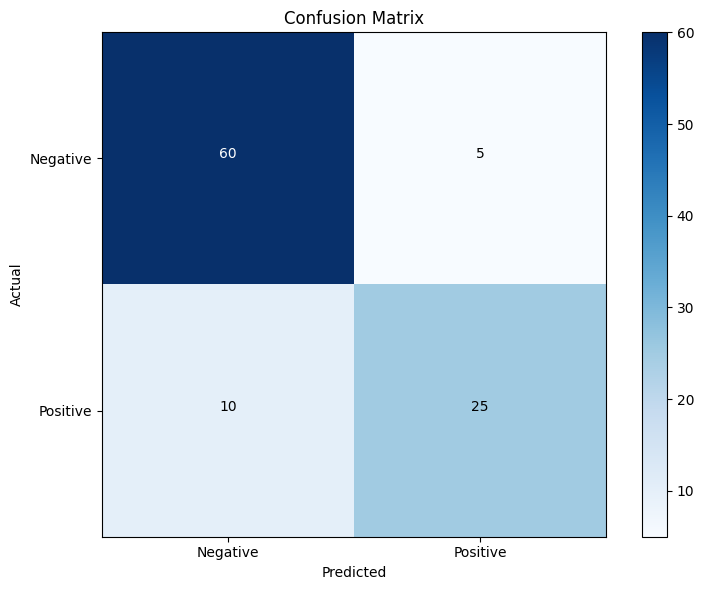

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example values for True Positives (TP), False Positives (FP),
# False Negatives (FN), and True Negatives (TN)
TP = 25
FP = 5
FN = 10
TN = 60

# Calculate the confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Define class labels
classes = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add annotations
thresh = conf_matrix.max() / 2.
for i, j in ((i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<Figure size 800x600 with 0 Axes>

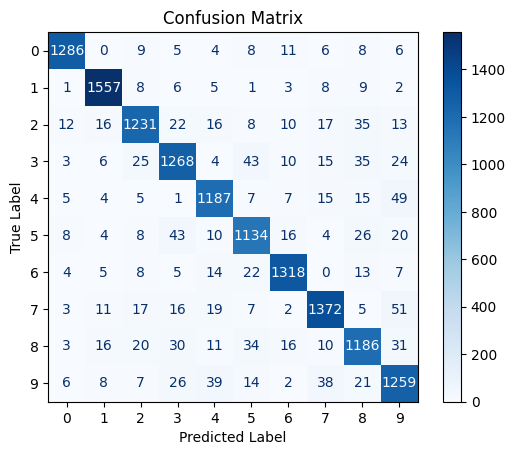

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)

# Partition the data into multiple subsets
num_partitions = 5
X_partitions = np.array_split(X, num_partitions)
y_partitions = np.array_split(y, num_partitions)

# Initialize list to store centroids
centroids = []

# Loop through each partition
for X_partition, y_partition in zip(X_partitions, y_partitions):
    # Perform KNN on each partition to find the nearest neighbors
    n_neighbors = 5
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_partition, y_partition)
    distances, indices = knn_model.kneighbors(X_partition)

    # Calculate the centroid from each set of nearest neighbors
    centroid = np.mean(X_partition[indices], axis=1)

    # Append the centroid to the list of centroids
    centroids.append(centroid)

# Stack the centroids to form dataset R
R = np.vstack(centroids)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(R, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Generate predictions on the test data
y_pred = best_dt_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [3]:
# prompt: find accuracy and precision and recall

# Calculate accuracy
accuracy = best_dt_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision and recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9141428571428571
Precision: 0.9135449900154139
Recall: 0.9132553577496351
